<a href="https://colab.research.google.com/github/pallavibekal/IISC-Linear-Algebra/blob/main/2200092_M2_NB_Linear_Regression_Implementation_using_OOPs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Implementation of Linear Regression using OOPs

## Learning Objectives

At the end of the mini-project, you will be able to :

- understand the power and flexibility of the Object-oriented programming (OOP) paradigm
- build OOP based classes and methods and use them to implement Linear Regression for solving real world data related queries


## Problem Statement

Implement linear regression using classes and methods built with OOP.

## Information

#### Object oriented programming in a nutshell

Object oriented programming is based around the concept of "objects". Objects have two kinds of attributes (accessed via . syntax): data attributes (or instance variables) and function attributes (or methods). Object data is typically modified by object methods.

To know more about OOPs click [here](https://docs.python.org/3/tutorial/classes.html)

#### Linear Regression

In statistics, linear regression is a linear approach to model the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression.

To know more about Linear regression  click [here](http://www.mit.edu/~6.s085/notes/lecture3.pdf)


## Grading = 10 Points

#### There are total 10 exercises and 1 point for each.

##### Importing Necessary Packages

In [38]:
import numpy as np # Numpy Package
import pandas as pd # Pandas Package
import matplotlib.pyplot as plt


#### Exercise 1: Generate 50 points with an approximate relationship of y = 3x + 1, with normally distributed errors.

**Hint:** np.linspace(), np.random.randn()

In [39]:
# Create our input and output data
# Get x for a sample size of 50
x = np.random.randn(50,1)

# Get our Error data - normal distribution 
e = np.random.normal(0,1.5, size=(50,1))

# Our y will then be
y = 3*x + 1 + e
print(y.shape)

(50, 1)


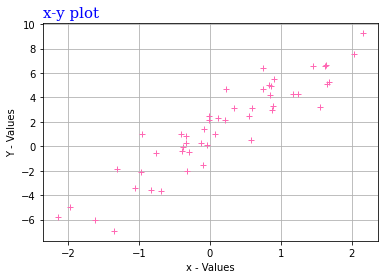

In [40]:
# Let us see the x-y plot 

plt.plot(x,y,'+',c='hotpink')
font1 = {'family':'serif','color':'blue','size':15}
plt.title('x-y plot', fontdict=font1, loc='left')
plt.xlabel('x - Values')
plt.ylabel('Y - Values')
plt.grid()
plt.show()

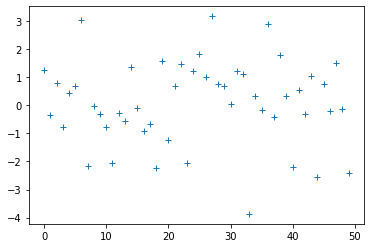

In [41]:
# Let's plot our errors

plt.plot(e,'+')
plt.show()

#### Exercise 2: Define a class named **LinearRegression** and add a short description of linear regression using built in method \_\_repr\_\_

**Hint:** [How to use \_\_repr\_\_ method](https://www.educative.io/edpresso/what-is-the-repr-method-in-python)

In [130]:
# YOUR CODE HERE
class LinearRegressionr:
  def __init__(self):
    self.coeffs = []

  def mean(self,list_val):
    return np.sum(list_val)/list_val.shape[0]

  def variance(self,list_val):
    avg = self.mean(list_val)
    return np.sum((list_val - avg)**2) / (list_val.shape[0] -1)
  
  def covariance(self,x,y): #co-variance between 2 variables
    avg_x = self.mean(x)
    avg_y = self.mean(y)
    return np.sum((x-avg_x)*(y-avg_y)) / (x.shape[0] - 1)

  def fit(self,x,y):
    b1 = self.covariance(x,y) / self.variance(x)
    b0 = self.mean(y) - (b1 * self.mean(x))
    self.coeffs.append(b0)
    self.coeffs.append(b1)
    return b0,b1

  def predict(self,x):
    y_pred = self.coeffs[1]*x + self.coeffs[0]
    return y_pred

  def rmse(self,x,y):
    rmse_error = (np.sum((y - self.predict(x))**2))**0.5 /x.shape[0] 
    return rmse_error



#### Exercise 3: In the above defined Linear Regression class, add a method which takes list of values as input and returns the mean of those values. 

**Note:** Don't use built-in method to calculate the mean

**Hint:** 
1. The mean is the average of the numbers
2. [How to define a method in a class](https://docs.python.org/3/tutorial/classes.html#scopes-and-namespaces-example)

In [131]:
# YOUR CODE HERE
L1 = LinearRegressionr()
L1.mean(x)

In [132]:
x.shape[0]

#### Exercise 4: In the above defined Linear Regression class, add a method which takes list of values as input and returns the variance of those values.

**Note:** Don't use built-in method to calculate the variance

**Hint:** 

1. The Variance is the average of the squared differences of each datapoint from the Mean
2. [How to access one method in different method inside a class](https://docs.python.org/3/tutorial/classes.html#scopes-and-namespaces-example)


In [133]:
# YOUR CODE HERE
L1.variance(x)

#### Exercise 5: In the above defined Linear Regression class, add a method which takes two values as input and returns the covariance of those values.

**Note:** Don't use built-in method to calculate the covariance

**Hint:** [How to calculate the covariance of two values](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/covariance/)

In [134]:
# YOUR CODE HERE
L1.covariance(x,y)

#### Exercise 6: In the above defined Linear Regression class, add a method named 'fit' which takes two values as input (x, y) and returns the estimated coefficients.

**Hint:**

- Equation of line : $  y = b_{0} + b_{1} * x $
- The estimated coefficients i.e. values of $b_{0}$ and $b_{1}$ are calculated as below
    - $ b_{1} = covariance(x,y) / variance(x) $ and
    - $ b_{0} = mean(y) - b_{1} * mean(x)$

In [135]:
# YOUR CODE HERE
b0, b1 = L1.fit(x,y)
print(b0,b1)

1.0332811040426413 3.343937747004963


#### Exercise 7: In the above defined Linear Regression class, add a method named predict which takes two values as input (x, y) and returns the predicted values.

**Hint:** substitute the estimated coefficients values calculated above in the equation of line i.e $  y = b_{0} + b_{1} * x $

In [136]:
# YOUR CODE HERE
l1_pred = L1.predict(2)

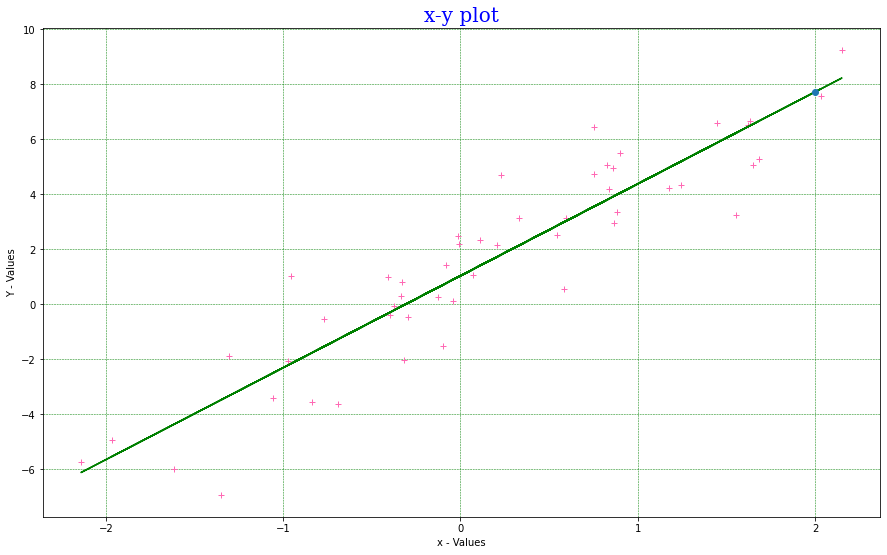

In [137]:
fig = plt.figure(figsize=(15,9))

plt.plot(x,y,'+',c='hotpink')
plt.plot(x, b0 + b1*x, 'g')
plt.plot(2, l1_pred,'o')
font1 = {'family':'serif','color':'blue','size':20}
plt.title('x-y plot', fontdict=font1, loc='center',)
plt.xlabel('x - Values')
plt.ylabel('Y - Values')
plt.grid(color='g',linestyle='--',linewidth=0.5)
plt.show()

#### Data

The dataset chosen for this experiment is **Pizza Franchise** dataset. The dataset contains the following data

X = annual franchise fee ($1000)

Y = start up cost ($1000) for a pizza franchise

Download the dataset [here](https://cdn.iisc.talentsprint.com/CDS/Datasets/pizza.csv)

#### Exercise 8: Using the above defined class LinearRegression, calculate the Estimated coefficients, fit the model, and predict the values on the Pizza Franchise dataset.

In [138]:
# YOUR CODE HERE
df_data = pd.read_csv('pizza.csv')
df_data.head()

,X,Y
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


In [139]:
df_data.describe()

,X,Y
count,36.000000,36.000000
mean,1134.777778,1291.055556
std,158.583211,124.058038
min,700.000000,1050.000000
25%,1080.000000,1250.000000
50%,1162.500000,1277.500000
75%,1250.000000,1300.000000
max,1375.000000,1830.000000


In [140]:
X = df_data.X
Y = df_data.Y


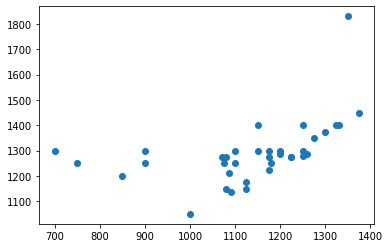

In [141]:
plt.scatter(X,Y)
plt.show()

In [143]:
L2 = LinearRegressionr()

In [144]:
B0, B1 = L2.fit(X,Y)
print(B0, B1)

867.604222262056 0.37315793592886476


In [145]:
print('Predicted Value -',L2.predict(1125))
print('From the data')
print(df_data[df_data.X == 1125])

Predicted Value - 1287.406900182029
From the data
       X     Y
1   1125  1150
31  1125  1175


#### Exercise 9: In the above defined Linear Regression class, add a method named RMSE which takes two values as input (x, y) and returns the error value.

**Hint:**

- [How to calculate RMSE value](https://towardsdatascience.com/what-does-rmse-really-mean-806b65f2e48e)

In [146]:
L2.rmse(X,Y)

#### Data

The dataset chosen for this exercise is **List Price Vs. Best Price for a New GMC Pickup** dataset. The dataset contains the following data

X = List price (in $1000) for a GMC pickup truck

Y = Best price (in $1000) for a GMC pickup truck

Download the dataset [here](https://cdn.iisc.talentsprint.com/CDS/Datasets/gmc.csv)

#### Exercise 10: Using above defined class LinearRegression, 

- calculate the Estimated coefficients, fit the model, and predict the values on the List Price Vs. Best Price for a New GMC Pickup dataset.
- calculate the RMSE error on predicted and actual values of List Price Vs. Best Price for a New GMC Pickup dataset using the function defined above.

In [147]:
# YOUR CODE HERE
df_data_2 = pd.read_csv('gmc.csv')
df_data_2.head()

,X,Y
0,12.4,11.2
1,14.3,12.5
2,14.5,12.7
3,14.9,13.1
4,16.1,14.1


In [148]:
df_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       23 non-null     float64
 1   Y       23 non-null     float64
dtypes: float64(2)
memory usage: 496.0 bytes


In [149]:
X_train, Y_train = df_data_2.X, df_data_2.Y
L3 = LinearRegressionr()

In [151]:
W0, W1 = L3.fit(X_train,Y_train)
print('Coefficients W0, W1:',W0,W1)

Coefficients W0, W1: 0.43458449082531736 0.8511440378638502


In [153]:
L3.rmse(X_train,Y_train)

### Optional

* Use the built-in `sklearn LinearRegression` package to determine the coefficients for the above problems. 
* Compare the coefficients obtained using OOP based implementation vs coefficients from `sklearn LinearRegression` package.

In [77]:
from sklearn.linear_model import LinearRegression

In [89]:
# Let us use sklearn to determine the coefficients for our first problem - y = 3x + 1
SKL1 = LinearRegression()

In [90]:
# Fit to model
SKL1.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
# Check the co-efficents from our LinearRegression Class and sklearns

print('SKlearn  Linear Regression Co-efficient is : ',SKL1.coef_[0])
print('Our LinearRegression Class Co-efficient is : ', b1)

SKlearn  Linear Regression Co-efficient is :  [3.34393775]
Our LinearRegression Class Co-efficient is :  3.343937747004963


In [93]:
print('SKlearn  Linear Regression Intercept is : ',SKL1.intercept_[0])
print('Our LinearRegression Class Intercept is : ', b0)


SKlearn  Linear Regression Intercept is :  1.0332811040426417
Our LinearRegression Class Intercept is :  1.0332811040426413


In [95]:
inp = 3

print('SKlearn  Linear Regression Prediction for input ', inp, 'is : ' ,SKL1.predict(np.array([[inp]])))
print('Our LinearRegression Class Prediction for input ', inp,' is : ', L1.predict(inp))


SKlearn  Linear Regression Prediction for input  3 is :  [[11.06509435]]
Our LinearRegression Class Prediction for input  3  is :  11.065094345057531


In [96]:
# Let us compare the results for the price dataset i.e the second problem

SKL2 = LinearRegression()
SKL3 = LinearRegression()

In [97]:
SKL2.fit(np.array(X).reshape(-1,1),Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
# Check the co-efficents from our LinearRegression Class and sklearns

print('SKlearn  Linear Regression Co-efficient is : ',SKL2.coef_[0])
print('Our LinearRegression Class Co-efficient is : ', B1)

SKlearn  Linear Regression Co-efficient is :  0.3731579359288649
Our LinearRegression Class Co-efficient is :  0.37315793592886476


In [101]:
print('SKlearn  Linear Regression Intercept is : ', SKL2.intercept_)
print('Our LinearRegression Class Intercept is : ', B0)


SKlearn  Linear Regression Intercept is :  867.6042222620559
Our LinearRegression Class Intercept is :  867.604222262056


In [102]:
inp = 1125

print('SKlearn  Linear Regression Prediction for input ', inp, 'is : ' ,SKL2.predict(np.array([[inp]])))
print('Our LinearRegression Class Prediction for input ', inp,' is : ', L2.predict(inp))


SKlearn  Linear Regression Prediction for input  1125 is :  [1287.40690018]
Our LinearRegression Class Prediction for input  1125  is :  1287.406900182029


In [154]:
## PROBLEM 3

SKL3.fit(np.array(X_train).reshape(-1,1),Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [155]:
# Check the co-efficents from our LinearRegression Class and sklearns

print('SKlearn  Linear Regression Co-efficient is : ',SKL3.coef_[0])
print('Our LinearRegression Class Co-efficient is : ', W1)

SKlearn  Linear Regression Co-efficient is :  0.8511440378638504
Our LinearRegression Class Co-efficient is :  0.8511440378638502


In [156]:
print('SKlearn  Linear Regression Intercept is : ', SKL3.intercept_)
print('Our LinearRegression Class Intercept is : ', W0)


SKlearn  Linear Regression Intercept is :  0.4345844908253138
Our LinearRegression Class Intercept is :  0.43458449082531736


In [157]:
inp = 14.5

print('SKlearn  Linear Regression Prediction for input ', inp, 'is : ' ,SKL2.predict(np.array([[inp]])))
print('Our LinearRegression Class Prediction for input ', inp,' is : ', L2.predict(inp))

SKlearn  Linear Regression Prediction for input  14.5 is :  [873.01501233]
Our LinearRegression Class Prediction for input  14.5  is :  873.0150123330246


**+ In this case, the co-efficients calculated in our own class are exactly the same as those calculated by the SKlearn Regressor. Therefore our predictions are also the same. This was possible to do because of the simplicity of the equation taken as input and that the calculation of the co-efficient therefore is relatively simple**